# Issue
* 4.2.4  
  * Why we don't need delta here. Just like 4.2.2

In [36]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# 4.2.1 均方誤差 (mean sauared error)

E = 1/2 $\sum_{k}{(y_k-t_k)^2}$

k: 資料的維度  
yk: 神經網路的輸出  
tk: 正確答案標籤 (label)


In [26]:
# y 是 softmax 的輸出
# t 是訓練資料的 label, 用 1 表示是正確答案。one-hot 表示式
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# ex1: 假設訓練結果，「2」的機率最高時 (0.6)
print("ex1: %f" % mean_squared_error(np.array(y), np.array(t)))
# ex2: 假設訓練結果，「7」的機率最高時 (0.6)
y_7 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print("ex2: %f" % mean_squared_error(np.array(y_7), np.array(t)))


ex1: 0.097500
ex2: 0.597500


# 4.2.2 交叉熵誤差 (cross entropy error)

E = -$\sum_{k}{(t_k * log(y_k))}$

log 是底為 e 的自然對數 ($log_e$)  
tk 是只有正確答案標籤的索引值為 1，其餘為 0 (one-hot)  
實質上此式只有談算對應正確答案標籤為 1 的輸出之自然對數

In [27]:
# 進行 np.log 運算時，要先加上微小值 delta 再計算。因為當 np.log(0) 時，np.log(0) 會變成代表負無限大的 -inf，這樣就無法繼續運算，所以才
# 會加上微小值，防範發上無限大的情況。
def cross_entropy_error(y, t):
    delta = 1e-7 # 10的負7次方
    return -np.sum(t * np.log(y + delta))

# ex1: 假設訓練結果，「2」的機率最高時 (0.6)
print("ex1: %f" % cross_entropy_error(np.array(y), np.array(t)))
# ex2: 假設訓練結果，「7」的機率最高時 (0.6)
print("ex2: %f" % cross_entropy_error(np.array(y_7), np.array(t)))

ex1: 0.510825
ex2: 2.302584


# 4.2.3 小批次學習

前面說明的損失函數範例，討論的是一個資料的損失函數。如果想求出訓練資料的**所有的損失函數和平均**，假設是交叉熵誤差時，可以寫成以下算式

E = -1/N $\sum_{n}\sum_{k}{(t_{nk} * log(y_{nk}))}$

假設資料有 N 筆，而 $t_{nk}$ 代表第 n 筆資料的第 k 個特徵值 ($y_{nk}$ 是神經網路輸出，$t_{nk}$ 是正確答案標籤)  
此式只是把之前的式子擴充成 N 筆資料而已。但最後還要除以 N，進行正規化。也就是求出「平均損失函數」

In [33]:
# ex: 60,000 張訓練資料中，隨機挑選出 10 張

import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
# print(batch_mask)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

# 其中，np.random.choice() 可以從指定的數字中，隨機取出想要的數量。
print(np.random.choice(60000, 10))
# print(x_batch)

(60000, 784)
(60000, 10)
[27853 24801 17372 20460 24940 23674 36258 43073 14894 40360]


# 4.2.4 以「批次對應版」執行交叉熵誤差

In [31]:
# why we don't need delta here?
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.xize)
        y = y.reshape(1, y.xize)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

# 4.3.1 微分

$\frac{df(x)}{dx} = \lim_{h\to0} \frac{f(x+h)-f(x)}h$

* 這種利用微小差分來計算微分的方式，稱為數值微分(numerical differentiation)
  * 數值微分含有誤差，所以計算 (x+h) 與 (x-h) 的函數 f 差分，可以減少誤差
  * 這裡的差分是以 x 為主來計算前後的差分，所以稱為中央差分
* 展開算試，計算微分，稱為解析 (analytic)。解析微分可以算出不含誤差的「真微分」
  * ex: $y=x^2$ => $\frac{dy}{dx}=2x$ => 當 x=2 的 y 之微分 = 4

In [39]:
# 中央差分
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h) 

# 4.3.2 數值微分的範例

$ y = 0.01x^2 + 0.1x$

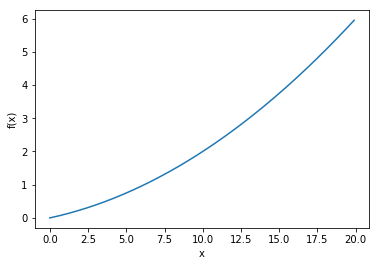

0.1999999999990898
0.2999999999986347


In [40]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1) # 從 0 到 20，以 0.1 為單位的 x 陣列
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

# 此式的解析解是 0.02x + 0.1。因此 x=5、x=10 的「真微分」是 0.2、 0.3
# 與這裡計算出的微分值非常接近，幾乎可視為相同數值的極小誤差
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

# 4.3.3 偏微分

$f(x_0, x_1) = x_0^2 + x_1^2$

In [ ]:
def function_2(x):
    # return x[0]**2 + x[1]**2
    return np.sum(x**2)